In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/content/cleaned_data.csv'
data = pd.read_csv(file_path)

In [3]:
data['DateandTime'] = pd.to_datetime(data['DateandTime'])

In [4]:
data.set_index('DateandTime', inplace=True)

In [5]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateandTime,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [6]:
#Extracting time-based features
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

In [7]:
#Lagged features (Lag 1 and Lag 2)
data['CO_lag1'] = data['CO(GT)'].shift(1)
data['CO_lag2'] = data['CO(GT)'].shift(2)
data['NOx_lag1'] = data['NOx(GT)'].shift(1)
data['NOx_lag2'] = data['NOx(GT)'].shift(2)
data['C6H6_lag1'] = data['C6H6(GT)'].shift(1)
data['C6H6_lag2'] = data['C6H6(GT)'].shift(2)

In [8]:
#Rolling statistics (mean and std over the last 3 hours)
data['CO_rolling_mean'] = data['CO(GT)'].rolling(window=3).mean()
data['CO_rolling_std'] = data['CO(GT)'].rolling(window=3).std()
data['NOx_rolling_mean'] = data['NOx(GT)'].rolling(window=3).mean()
data['NOx_rolling_std'] = data['NOx(GT)'].rolling(window=3).std()
data['C6H6_rolling_mean'] = data['C6H6(GT)'].rolling(window=3).mean()
data['C6H6_rolling_std'] = data['C6H6(GT)'].rolling(window=3).std()

In [9]:
data.dropna(inplace=True)

In [10]:
data[['CO(GT)', 'NOx(GT)', 'C6H6(GT)', 'hour', 'day_of_week', 'month',
      'CO_lag1', 'CO_lag2', 'NOx_lag1', 'NOx_lag2', 'C6H6_lag1', 'C6H6_lag2',
      'CO_rolling_mean', 'CO_rolling_std', 'NOx_rolling_mean', 'NOx_rolling_std',
      'C6H6_rolling_mean', 'C6H6_rolling_std']].head()

,CO(GT),NOx(GT),C6H6(GT),hour,day_of_week,month,CO_lag1,CO_lag2,NOx_lag1,NOx_lag2,C6H6_lag1,C6H6_lag2,CO_rolling_mean,CO_rolling_std,NOx_rolling_mean,NOx_rolling_std,C6H6_rolling_mean,C6H6_rolling_std
DateandTime,,,,,,,,,,,,,,,,,,
2004-03-10 20:00:00,2.2,131.0,8.997817,20,2,3,2.0,2.6,103.0,166.0,9.397165,11.881723,2.266667,0.305505,133.333333,31.564748,10.092235,1.562553
2004-03-10 21:00:00,2.2,172.0,9.228796,21,2,3,2.2,2.0,131.0,103.0,8.997817,9.397165,2.133333,0.115470,135.333333,34.703506,9.207926,0.200490
2004-03-10 22:00:00,1.6,131.0,6.518224,22,2,3,2.2,2.2,172.0,131.0,9.228796,8.997817,2.000000,0.346410,144.666667,23.671361,8.248279,1.502716
2004-03-10 23:00:00,1.2,89.0,4.741012,23,2,3,1.6,2.2,131.0,172.0,6.518224,9.228796,1.666667,0.503322,130.666667,41.501004,6.829344,2.260011
2004-03-11 00:00:00,1.2,62.0,3.624399,0,3,3,1.2,1.6,89.0,131.0,4.741012,6.518224,1.333333,0.230940,94.000000,34.770677,4.961212,1.459425


In [11]:
data.to_csv("model.csv", index=False)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
features = ['hour', 'day_of_week', 'month', 'CO_lag1', 'CO_lag2', 'NOx_lag1', 'NOx_lag2',
            'C6H6_lag1', 'C6H6_lag2', 'CO_rolling_mean', 'CO_rolling_std', 'NOx_rolling_mean',
            'NOx_rolling_std', 'C6H6_rolling_mean', 'C6H6_rolling_std']

#Target pollutant to predict CO
target = 'CO(GT)'

In [14]:
#Train-test split (chronological)
train_size = int(0.8 * len(data))  #80% training, 20% testing
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [15]:
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [16]:
#Model-1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [17]:
#Predictions and evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [18]:
#Model-2: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
#Predictions and evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [21]:
#Model-3: XGBoost
xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
# Predictions and evaluation for XGBoost
y_pred_xg = xg_model.predict(X_test)
mae_xg = mean_absolute_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))

In [23]:
# Baseline Model (previous value prediction)
y_pred_baseline = y_test.shift(1)
y_pred_baseline = y_pred_baseline[1:]
y_test_baseline = y_test[1:]

In [24]:
mae_baseline = mean_absolute_error(y_test_baseline, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test_baseline, y_pred_baseline))

In [25]:
# Results summary
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Baseline'],
    'MAE': [mae_linear, mae_rf, mae_xg, mae_baseline],
    'RMSE': [rmse_linear, rmse_rf, rmse_xg, rmse_baseline]
}

In [26]:
results_df = pd.DataFrame(results)

In [28]:
results_df

,Model,MAE,RMSE
0,Linear Regression,9.212871e-15,1.327559e-14
1,Random Forest,1.020261e-01,1.720200e-01
2,XGBoost,8.655742e-02,1.671334e-01
3,Baseline,5.408962e-01,8.376522e-01


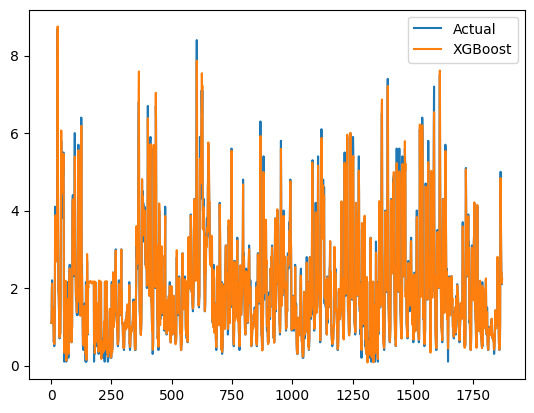

In [29]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_xg, label='XGBoost')
plt.legend()

In [31]:
xg_model.save_model('xgboost_model.json')